In [62]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import api

import importlib
importlib.reload(api)
import urllib.request
import librosa
import os
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cid = '57c323090e5c4cd181f776ee8d4a1f14'
secret = 'a65d4205fd1143b196475eaf702d649e'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Joint Plot Matrix 

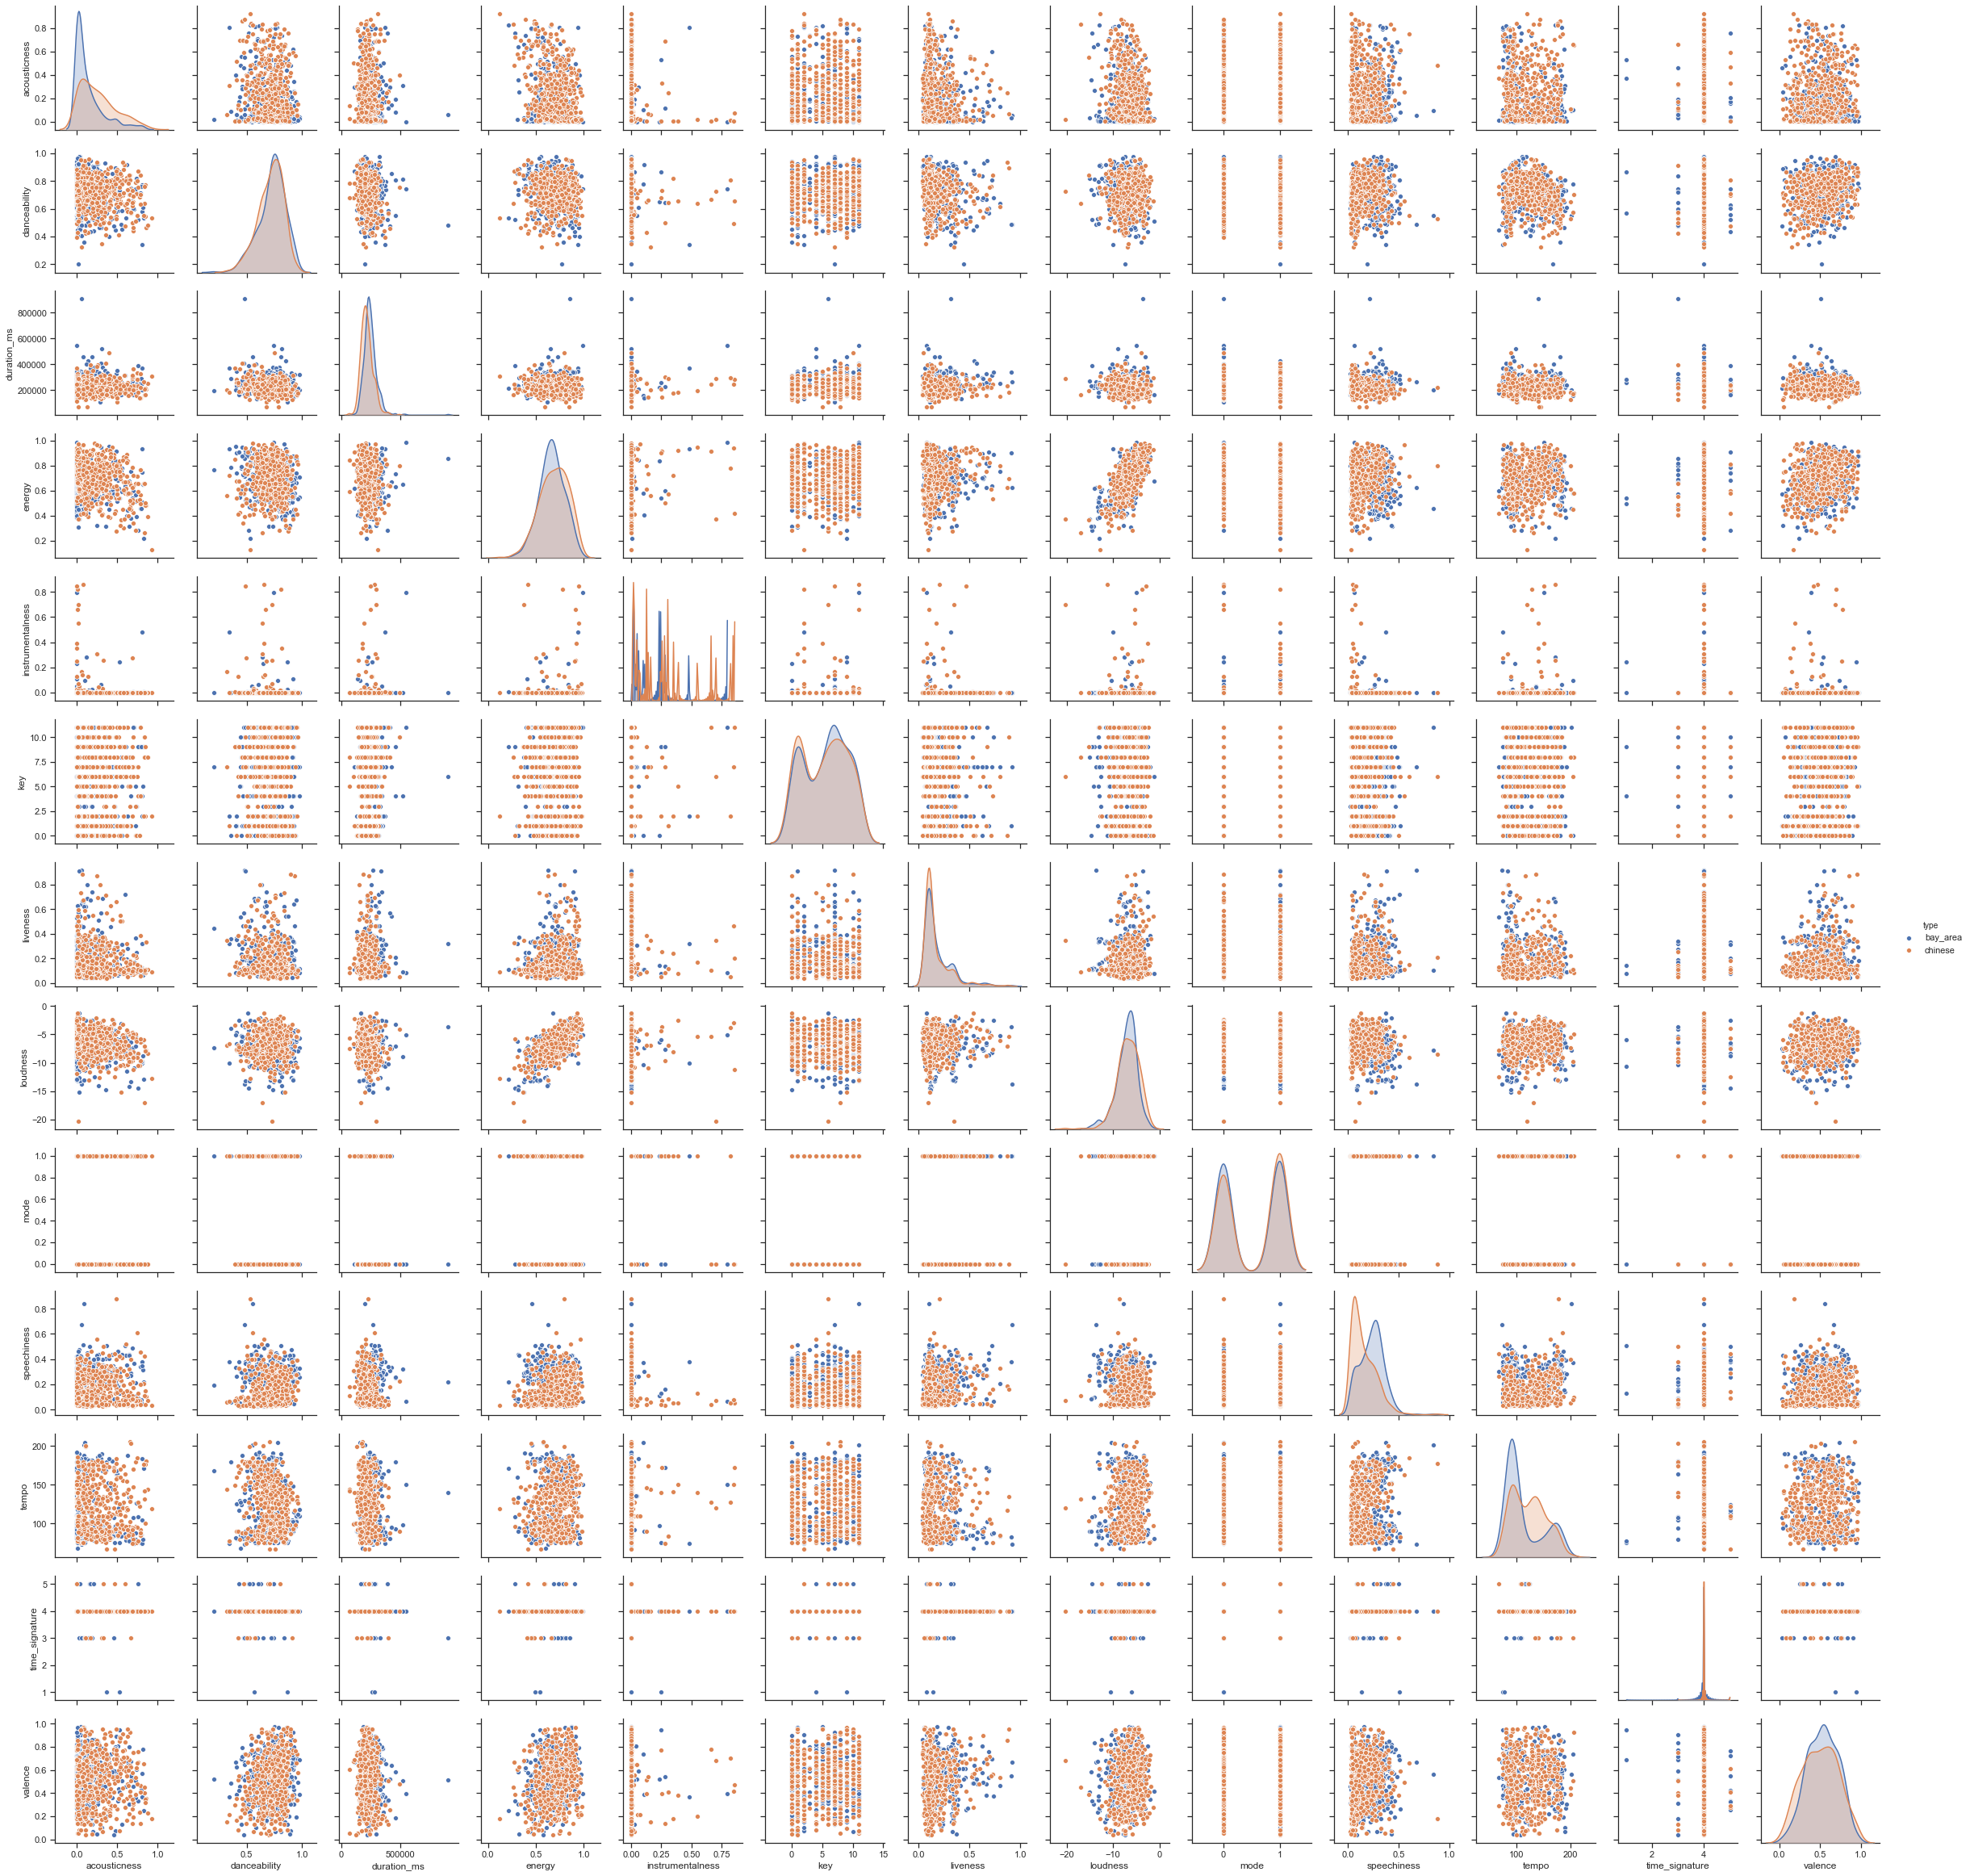

In [157]:
df = pd.read_csv("../Spotify_data.csv")
df_useful= df[['type', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'speechiness', 'tempo', 'time_signature', 'valence']]
sns.set(style = "ticks")
sns.pairplot(df_useful, hue="type")

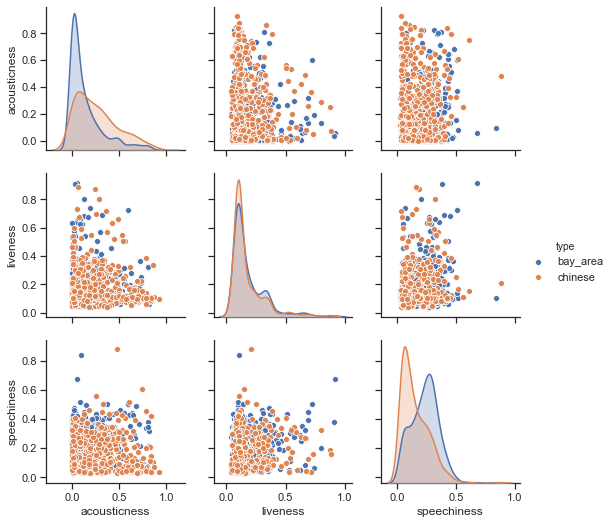

In [131]:
df_filtered = df[['acousticness', 'liveness', 'speechiness', 'type']]
sns.set(style = "ticks")
sns.pairplot(df_filtered, hue="type")

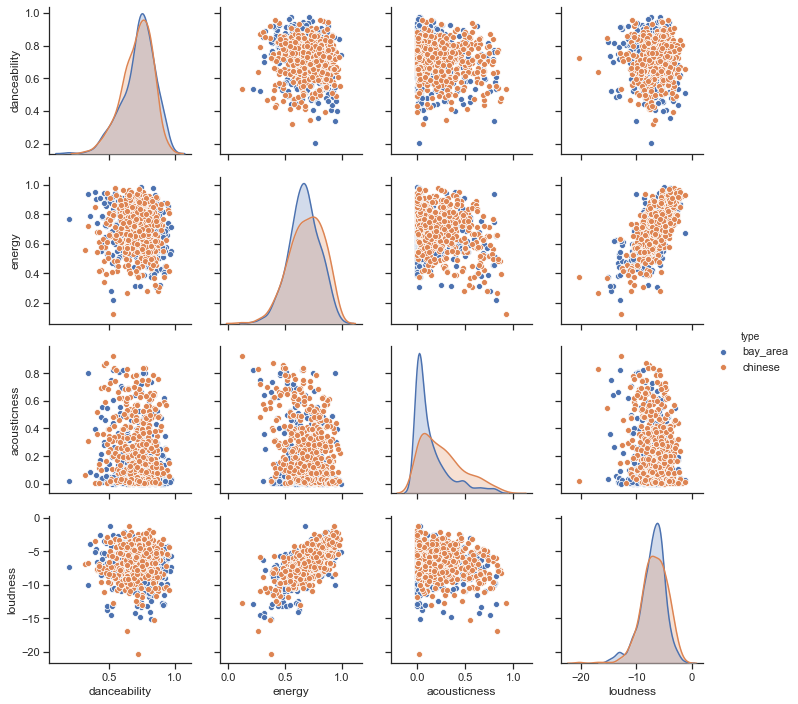

In [132]:
df_filtered = df[['danceability', 'energy', 'acousticness', 'loudness', 'type']]
sns.set(style = "ticks")
sns.pairplot(df_filtered, hue="type")

# Multiple bivariate KDE plots

Text(0.5, 1.0, 'Speechiness vs. Acousticness of Bay Area and Chinese Rap')

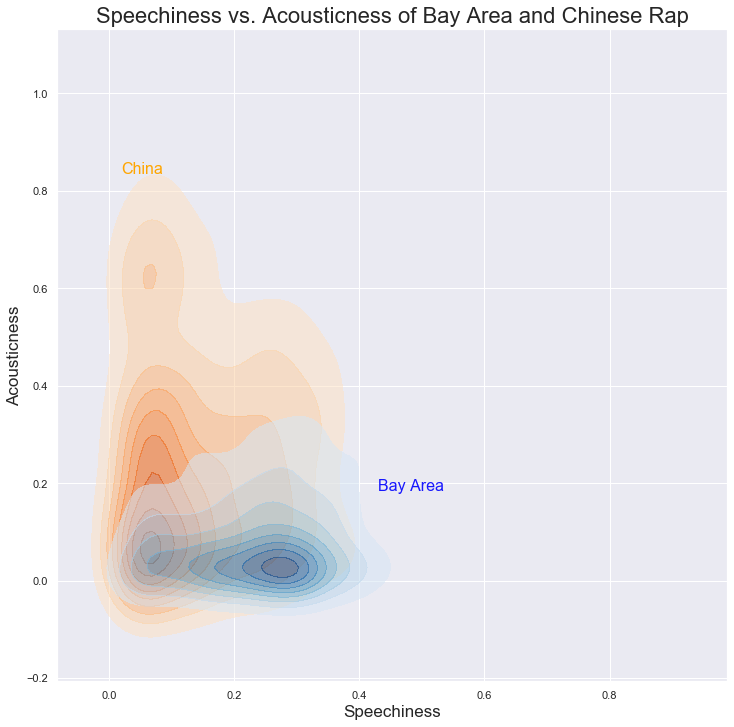

In [133]:
sns.set(style="darkgrid")

bay = df_useful.query("type == 'bay_area'")
china = df_useful.query("type == 'chinese'")

# Set up the figure
f, ax = plt.subplots(figsize=(12, 12))


# Draw the two density plots
ax = sns.kdeplot(china.speechiness, china.acousticness,
                 cmap="Oranges", shade=True, shade_lowest=False, alpha=.55)
ax = sns.kdeplot(bay.speechiness, bay.acousticness,
                 cmap="Blues", shade=True, shade_lowest=False, alpha=0.55)

# Wanted palette details
enmax_palette = ["#ffa500", "#0000FF"]
color_codes_wanted = ['orange', 'blue']

c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# Add labels to the plot
red = sns.color_palette("Oranges")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(.43, .184, "Bay Area", size=18, color=c("blue"), alpha = .9, fontsize=16)
ax.text(.020, .835, "China", size=18, color=c("orange"), alpha = 1, fontsize=16)

plt.xlabel('Speechiness', fontsize=17)
plt.ylabel('Acousticness', fontsize=17)
plt.title('Speechiness vs. Acousticness of Bay Area and Chinese Rap', fontsize=22)

Text(0.5, 1.0, 'Speechiness vs. Tempo of Bay Area and Chinese Rap')

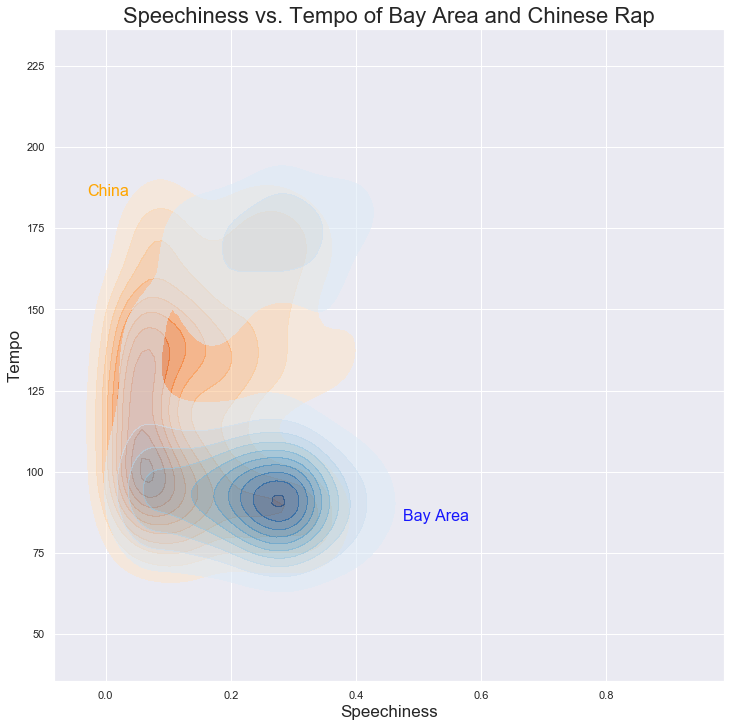

In [134]:
sns.set(style="darkgrid")

bay = df_useful.query("type == 'bay_area'")
china = df_useful.query("type == 'chinese'")

# Set up the figure
f, ax = plt.subplots(figsize=(12, 12))


# Draw the two density plots
ax = sns.kdeplot(china.speechiness, china.tempo,
                 cmap="Oranges", shade=True, shade_lowest=False, alpha=.55)
ax = sns.kdeplot(bay.speechiness, bay.tempo,
                 cmap="Blues", shade=True, shade_lowest=False, alpha=0.55)

# Wanted palette details
enmax_palette = ["#ffa500", "#0000FF"]
color_codes_wanted = ['orange', 'blue']

c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# Add labels to the plot
red = sns.color_palette("Oranges")[-2]
blue = sns.color_palette("Blues")[-2]


plt.xlabel('Speechiness', fontsize=17)
plt.ylabel('Tempo', fontsize=17)
ax.text(.475, 85, "Bay Area", size=18, color=c("blue"), alpha = .9, fontsize=16)
ax.text(-.03, 185, "China", size=18, color=c("orange"), alpha = 1, fontsize=16)
plt.title('Speechiness vs. Tempo of Bay Area and Chinese Rap', fontsize=22)

Text(0.5, 1.0, 'Speechiness vs. Valence of Bay Area and Chinese Rap')

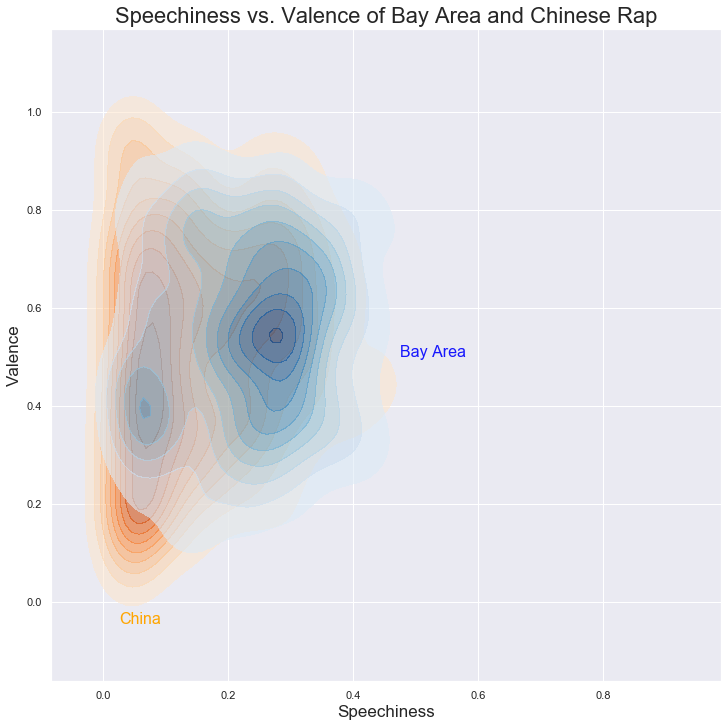

In [135]:
sns.set(style="darkgrid")

bay = df_useful.query("type == 'bay_area'")
china = df_useful.query("type == 'chinese'")

# Set up the figure
f, ax = plt.subplots(figsize=(12, 12))


# Draw the two density plots
ax = sns.kdeplot(china.speechiness, china.valence,
                 cmap="Oranges", shade=True, shade_lowest=False, alpha=.55)
ax = sns.kdeplot(bay.speechiness, bay.valence,
                 cmap="Blues", shade=True, shade_lowest=False, alpha=0.6)

# Wanted palette details
enmax_palette = ["#ffa500", "#0000FF"]
color_codes_wanted = ['orange', 'blue']

c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# Add labels to the plot
red = sns.color_palette("Oranges")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(.475, .5, "Bay Area", size=18, color=c("blue"), alpha = .9, fontsize=16)
ax.text(.026, -.045, "China", size=18, color=c("orange"), alpha = 1, fontsize=16)
plt.xlabel('Speechiness', fontsize=17)
plt.ylabel('Valence', fontsize=17)
plt.title('Speechiness vs. Valence of Bay Area and Chinese Rap', fontsize=22)

# KDE Distribution Plots

In [136]:
df_useful_china = df_useful[df_useful['type']=='chinese']
df_useful_bay_area = df_useful[df_useful['type']=='bay_area']

In [137]:
def KDE(var, title, xlab):

    music_types = ['chinese', 'bay_area']

    for cat in music_types:

        subset = df_useful[df_useful['type'] == cat]

        # Draw the density plot
        sns.distplot(subset[var], hist = True, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = cat)
    fig = plt.gcf()
    fig.set_size_inches(14, 9)
    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'Catagory')
    plt.title(title, fontsize=22)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    
    print(df_useful.groupby('type').describe()[var])



          count        mean        std     min       25%      50%       75%  \
type                                                                          
bay_area  500.0  113.751810  35.082668  67.636  89.97975   95.991  142.4915   
chinese   451.0  123.223845  30.891842  66.584  95.01150  121.907  145.9475   

              max  
type               
bay_area  204.151  
chinese   206.072  


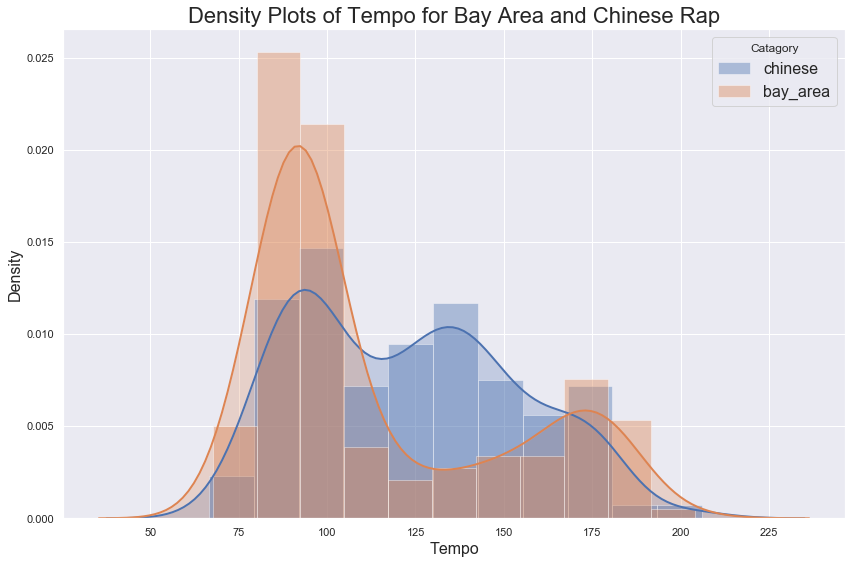

In [138]:
KDE('tempo', 'Density Plots of Tempo for Bay Area and Chinese Rap', 'Tempo')

          count      mean       std     min     25%     50%    75%    max
type                                                                     
bay_area  500.0  0.535048  0.189059  0.0383  0.3895  0.5415  0.686  0.970
chinese   451.0  0.505554  0.217879  0.0421  0.3440  0.5110  0.665  0.965


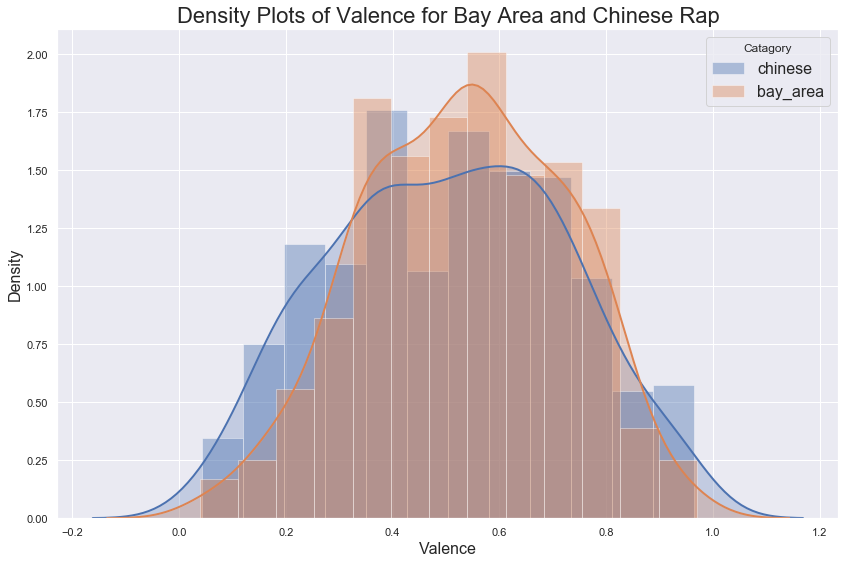

In [139]:
KDE('valence', 'Density Plots of Valence for Bay Area and Chinese Rap', 'Valence')

          count      mean       std       min      25%     50%    75%    max
type                                                                        
bay_area  500.0  0.144837  0.181907  0.000011  0.01775  0.0673  0.201  0.823
chinese   451.0  0.266924  0.221360  0.000595  0.08310  0.2290  0.398  0.925


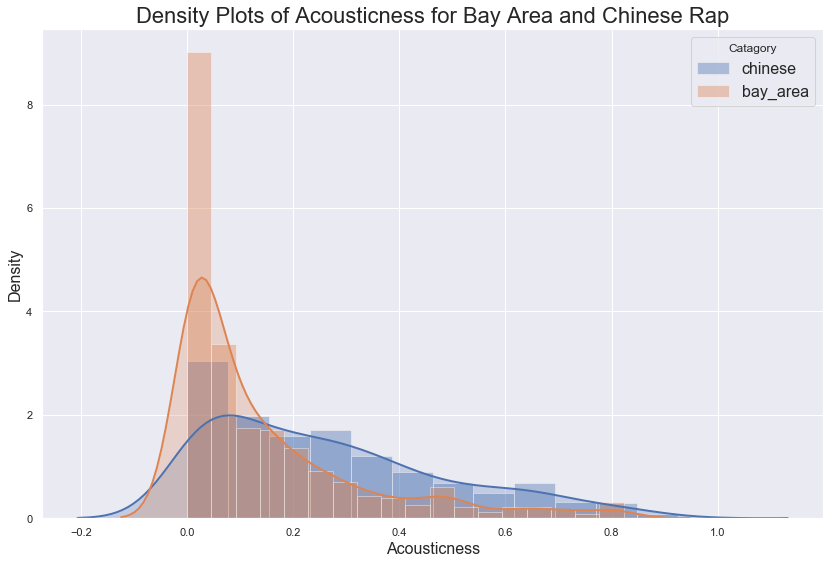

In [140]:
KDE('acousticness', 'Density Plots of Acousticness for Bay Area and Chinese Rap', 'Acousticness')

          count      mean       std    min     25%     50%      75%    max
type                                                                      
bay_area  500.0  0.729808  0.121377  0.202  0.6625  0.7445  0.81325  0.974
chinese   451.0  0.716849  0.113303  0.322  0.6430  0.7330  0.80200  0.959


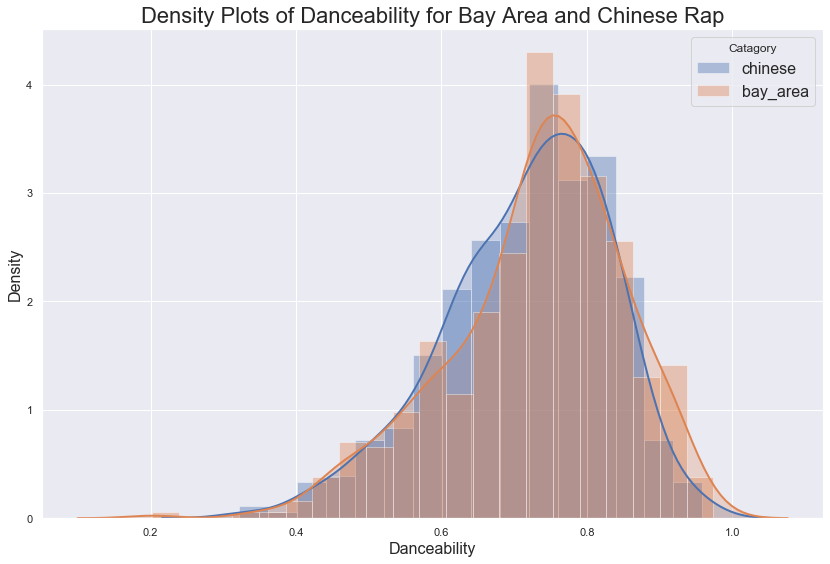

In [141]:
KDE('danceability', 'Density Plots of Danceability for Bay Area and Chinese Rap', 'Danceability')

          count           mean           std       min        25%       50%  \
type                                                                          
bay_area  500.0  247490.886000  60340.279755  107216.0  214859.75  240026.5   
chinese   451.0  218608.764967  51431.983119   67606.0  183436.00  210935.0   

               75%       max  
type                          
bay_area  271143.5  904573.0  
chinese   244000.0  490667.0  


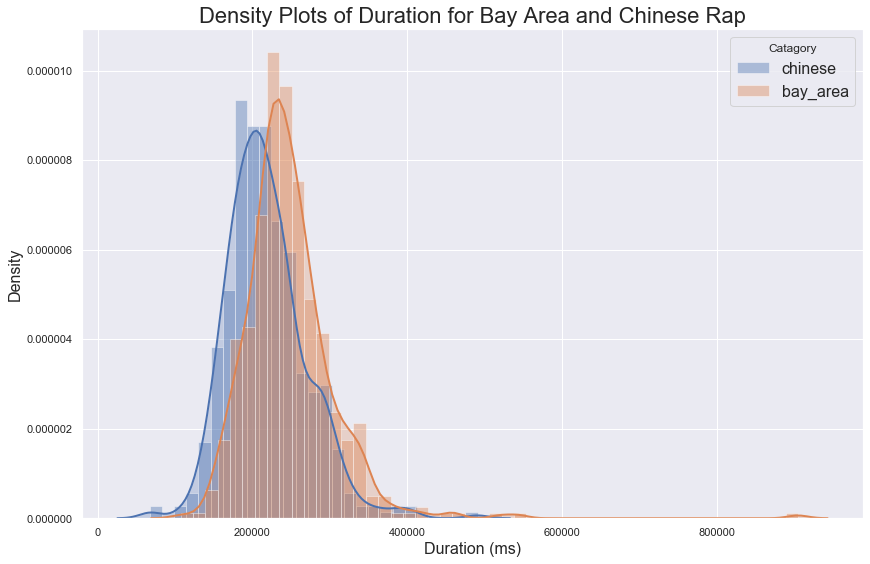

In [142]:
KDE('duration_ms', 'Density Plots of Duration for Bay Area and Chinese Rap', 'Duration (ms)')

          count      mean       std     min      25%    50%     75%    max
type                                                                      
bay_area  500.0 -7.047632  2.218537 -15.136 -8.26875 -6.717 -5.6205 -1.217
chinese   451.0 -6.707153  2.369197 -20.306 -8.13800 -6.671 -5.0400 -1.268


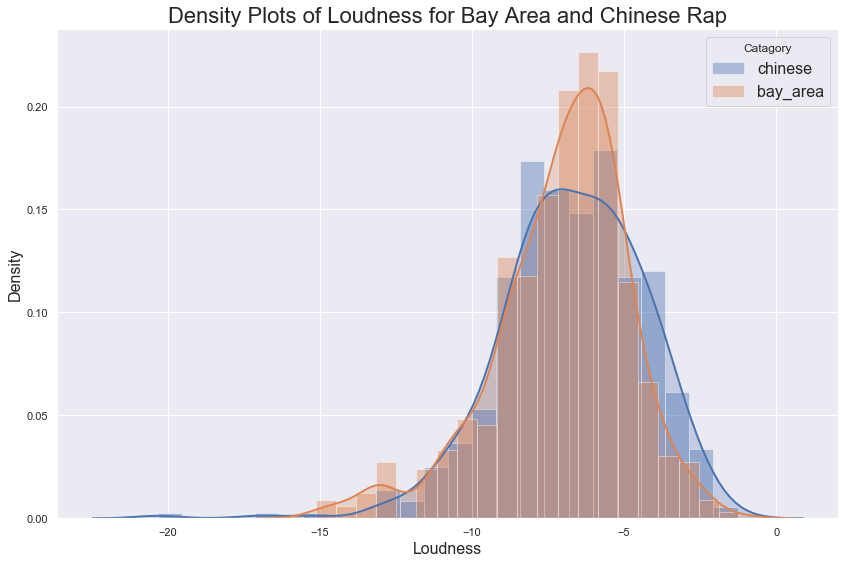

In [143]:
KDE('loudness', 'Density Plots of Loudness for Bay Area and Chinese Rap', 'Loudness')

          count      mean       std    min    25%     50%    75%    max
type                                                                   
bay_area  500.0  0.668822  0.131548  0.216  0.585  0.6695  0.756  0.989
chinese   451.0  0.691344  0.149492  0.124  0.587  0.7040  0.809  0.979


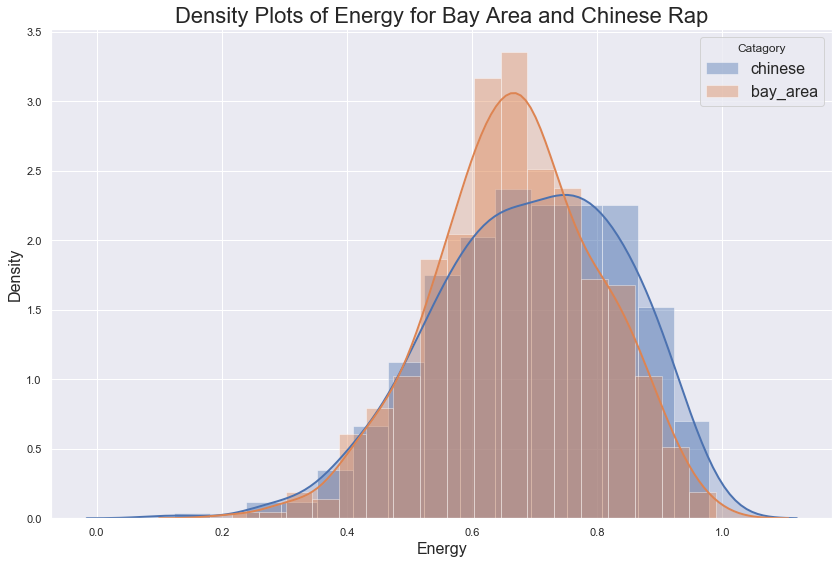

In [144]:
KDE('energy', 'Density Plots of Energy for Bay Area and Chinese Rap', 'Energy')

          count      mean       std     min      25%    50%      75%    max
type                                                                       
bay_area  500.0  0.236664  0.113967  0.0251  0.15200  0.248  0.30725  0.841
chinese   451.0  0.157365  0.116222  0.0264  0.06415  0.126  0.22850  0.879


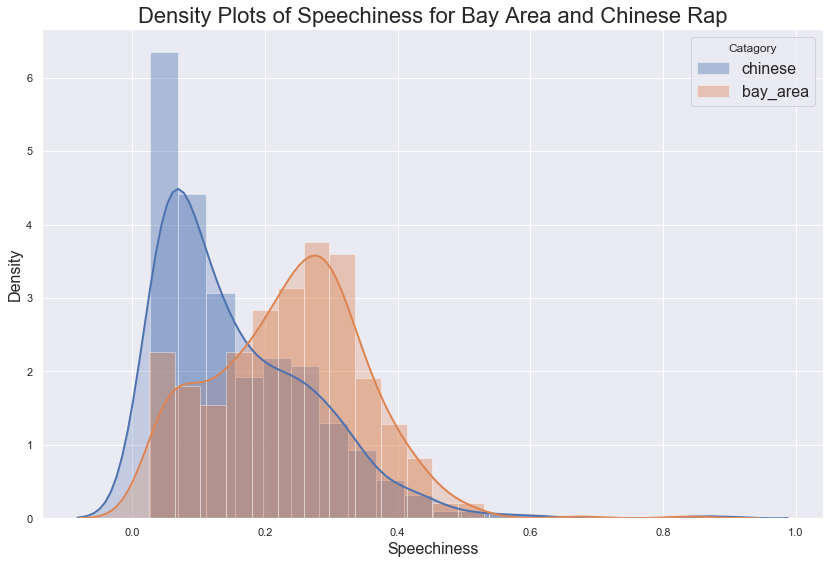

In [145]:
KDE('speechiness', 'Density Plots of Speechiness for Bay Area and Chinese Rap', 'Speechiness')

# Model Creation (Spotify Features)

In [146]:
def createModel(model, model_df, df_features):

    feature_cols = df_features
    X = feature_cols 
    y = df_useful['type'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    clf = model
    fitted = clf.fit(X_train, y_train)
    pred = fitted.predict(X_test)
    accuracy = fitted.score(X_test, y_test)
    print('Accuracy:  ' + str(accuracy))
    f1 = f1_score(y_test, pred, average='weighted', labels=np.unique(pred))
    print('F1_score:  ' + str(f1))
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('tn: ' + str(tn) + '  |  fp: ' + str(fp) + '  |  fn: ' + str(fn) + '  |  tp: ' + str(tp))



------------------------------------------------------------------------------All Features from Spotify--------------------------------------------------------------------

In [147]:
createModel(LinearSVC(), df_useful, df_useful[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']])

Accuracy:  0.450261780104712
F1_score:  0.6209386281588448
tn: 0  |  fp: 105  |  fn: 0  |  tp: 86


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [148]:
createModel(LogisticRegression(), df_useful, df_useful[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']])

Accuracy:  0.6335078534031413
F1_score:  0.6293328867499898
tn: 75  |  fp: 28  |  fn: 42  |  tp: 46


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [149]:
createModel(MLPClassifier(), df_useful, df_useful[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']])

Accuracy:  0.5445026178010471
F1_score:  0.7050847457627119
tn: 104  |  fp: 0  |  fn: 87  |  tp: 0


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [150]:
createModel(RandomForestClassifier(), df_useful, df_useful[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']])

Accuracy:  0.7643979057591623
F1_score:  0.7629613474394654
tn: 83  |  fp: 17  |  fn: 28  |  tp: 63


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------Select Features from Spotify EDA---------------------------------------------------------------

In [151]:
createModel(LinearSVC(), df_useful, df_useful[['acousticness', 'tempo', 'speechiness']])

Accuracy:  0.46596858638743455
F1_score:  0.31081179749945237
tn: 2  |  fp: 101  |  fn: 1  |  tp: 87


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [152]:
createModel(LogisticRegression(), df_useful, df_useful[['acousticness', 'tempo', 'speechiness']])

Accuracy:  0.7225130890052356
F1_score:  0.7212164568381949
tn: 74  |  fp: 18  |  fn: 35  |  tp: 64


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
createModel(MLPClassifier(), df_useful, df_useful[['acousticness', 'tempo', 'speechiness']])

Accuracy:  0.743455497382199
F1_score:  0.7428966237275644
tn: 84  |  fp: 23  |  fn: 26  |  tp: 58


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [154]:
createModel(RandomForestClassifier(), df_useful, df_useful[['acousticness', 'tempo', 'speechiness']])

Accuracy:  0.7329842931937173
F1_score:  0.7320148184866984
tn: 83  |  fp: 23  |  fn: 28  |  tp: 57


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
